In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Objectif:

In this Project we will see  how to handle sound files in python, compute sound and audio features from them, and run machine learning algorithms on them.

# Import the Libraries needed

**pandas :** is a library written for the Python programming language allowing data manipulation and analysis. In particular, it provides data structures and operations for manipulating numerical arrays and time series.

**numpy :** is an extension of the Python programming language, designed to manipulate multidimensional matrices or arrays as well as mathematical functions operating on these arrays.

**matplotlib :** Matplotlib is a library of the Python programming language for plotting and visualizing data in graphical form. It can be combined with the NumPy and SciPy python libraries for scientific computation.

**Scipy :** is a project aiming to unify and federate a set of Python libraries for scientific use. Scipy uses the arrays and matrices of the NumPy module.

**Pickle :** is a python module that allows you to save one or more variables in a file and retrieve their values later. Variables can be of any type.

**librosa :** It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system.

**IPython.display :** lets you play audio directly in your notebook.

**Librosa :**  is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
audio_data = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00096.wav'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

This step :

```
data , sr = librosa.load(audio_data)
```

loads and decodes the audio as a time series y, represented as a one-dimensional NumPy floating point array. The variable sr contains the sampling rate of y, that is, the number of samples per second of audio. By default, all audio is mixed to mono and resampled to 22050 Hz at load time. This behavior can be overridden by supplying additional arguments to librosa.load().

Audio will be automatically resampled to the given rate (default sr=22050).

To preserve the native sampling rate of the file, use sr=None.

We can change this behavior by resampling at 45.6KHz.

In [ ]:
librosa.load(audio_data, sr=45600)

This returns an audio time series as a numpy array with a default sampling rate(sr)

# Playing Audio:

With the use of IPython.display.Audio we will play the audio in our notebook.

In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

# Visualizing Audio :

**Plot Raw Wave File** : 

Plot Raw Wave plot is the amplitude envelope of a waveform

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color = "#2B4F72")
plt.show()

**Plot Spectrogram**:

A spectrogram is a visual way of representing the signal loudness, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis represents frequencies (from 0 to 10kHz), and the horizontal axis represents the time of the clip. 


Let's Convert the frequency axis to a logarithm , because we see that all actions (in red) is taking place at the bottom of the spectrum.

In [ ]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

[](http://)**Spectral Rolloff**


is the frequency below which a specified percentage of the total spectral energy

[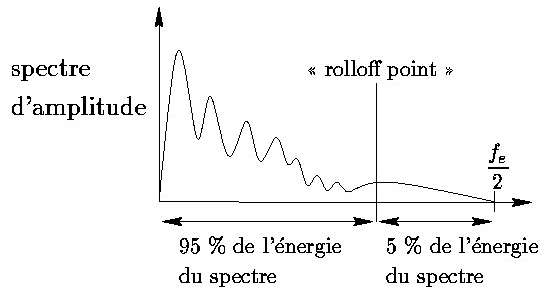](http://)

In [ ]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color = "#2B4F72")

**Zero-Crossing Rate**:

a zero crossing is said to occur if successive samples have different
algebraic signs. The rate at which zero crossings occur is a simple measure of the frequency content of a
signal. Zero-crossing rate is a measure of number of times in a given time interval/frame that the
amplitude of the speech signals passes through a value of zero

[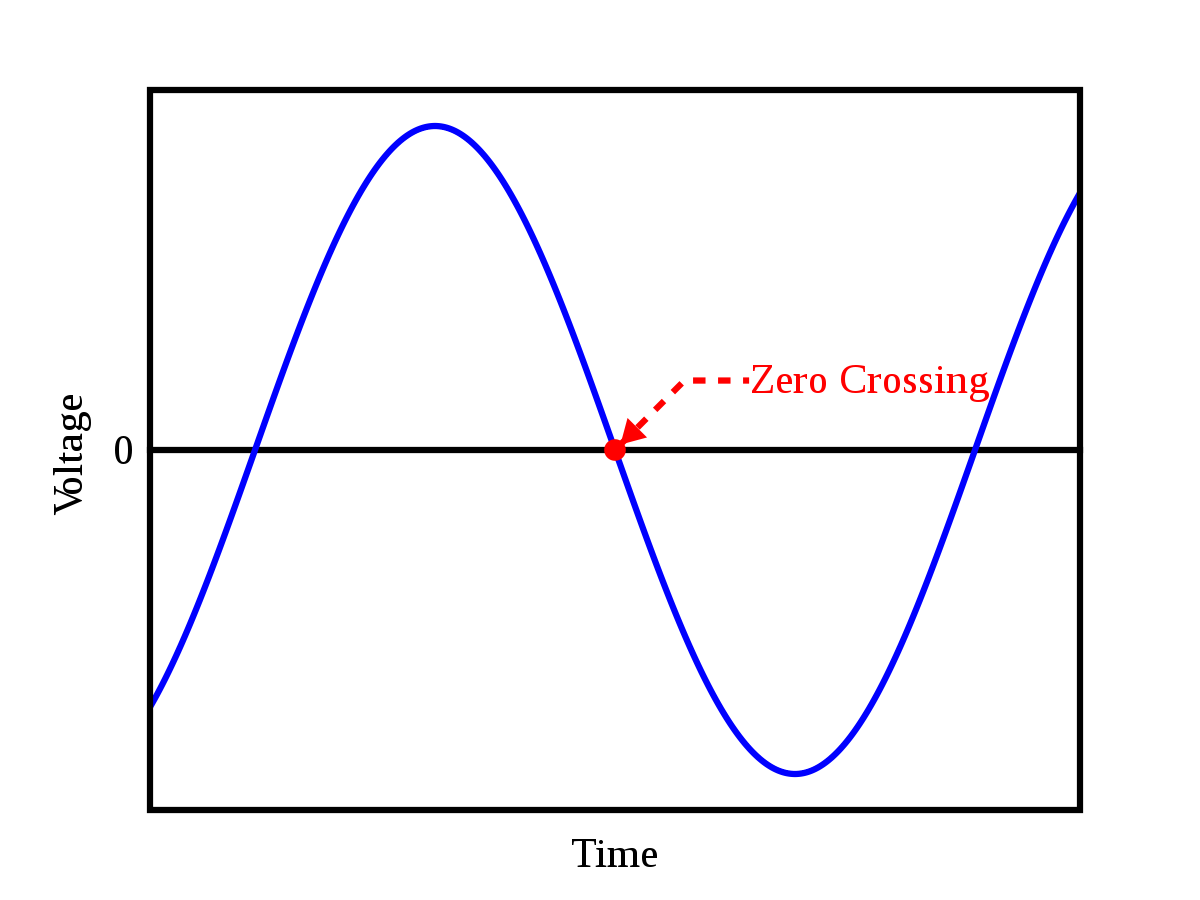](http://)

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, color="#2B4F72")

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1], color="#2B4F72")
plt.grid()

The graph shows 11 zero crossings. Let’s verify it with Librosa.

In [ ]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print("The number of zero-crossings is :",sum(zero_crossings))

**Chroma feature**

is a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

The link of the image: [https://wikivisually.com/wiki/Chroma_feature](http://)

[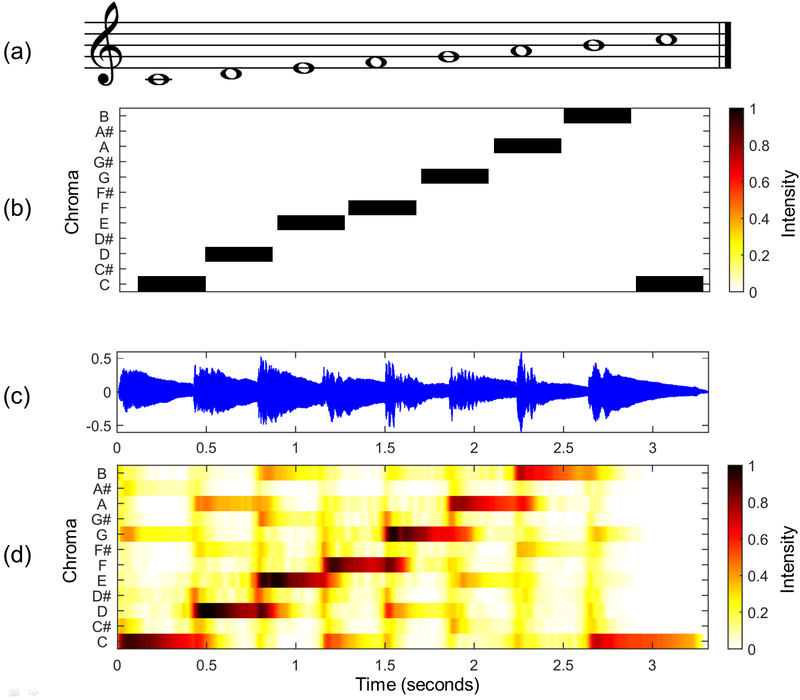](http://)

In [ ]:
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

# Training Our Model

**Classification**

Our Datasets contains 10 genres :
*   Blues
*   Classical
*   Country
*   Disco
*   Hiphop
*   Jazz
*   Metal
*   Pop
*   Reggae
*   Rock

In [ ]:
%matplotlib inline
from keras import layers
import keras

In [ ]:
df1 = pd.read_csv('../input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.dtypes

We will drop the first column of "filename":

In [ ]:
df1 = df1.drop(labels='filename',axis=1)

**Preprocessing the Data**

We will now focus on the last column "label" the categorical column and we will try to encode it with the function LabelEncoder() of sklearn.preprocessing.

In [ ]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()

In [ ]:
y = encoder.fit_transform(genre_list)

In [ ]:
print(y)

In [ ]:
print(df1.iloc[:, :-1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from keras.models import Sequential

In [ ]:
# Neural network
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

In [ ]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
print("The test loss is :",test_loss, "\nThe test accuracy is :",test_acc)